In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# importing adtaset
df = pd.read_csv("Dataset/Crop_recommendation.csv")

In [24]:
# Checking first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
# Checking last 5 rows
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [26]:
# Getting dimensions of dataset
df.shape

(2200, 8)

In [27]:
# Getting info about dataset attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [28]:
# Checking for missing values for attributes
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
# Checking the duplicate values in dataset
df.duplicated().sum()

0

In [30]:
# Checking distribution of target attribute
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [31]:
# Getting statistical data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


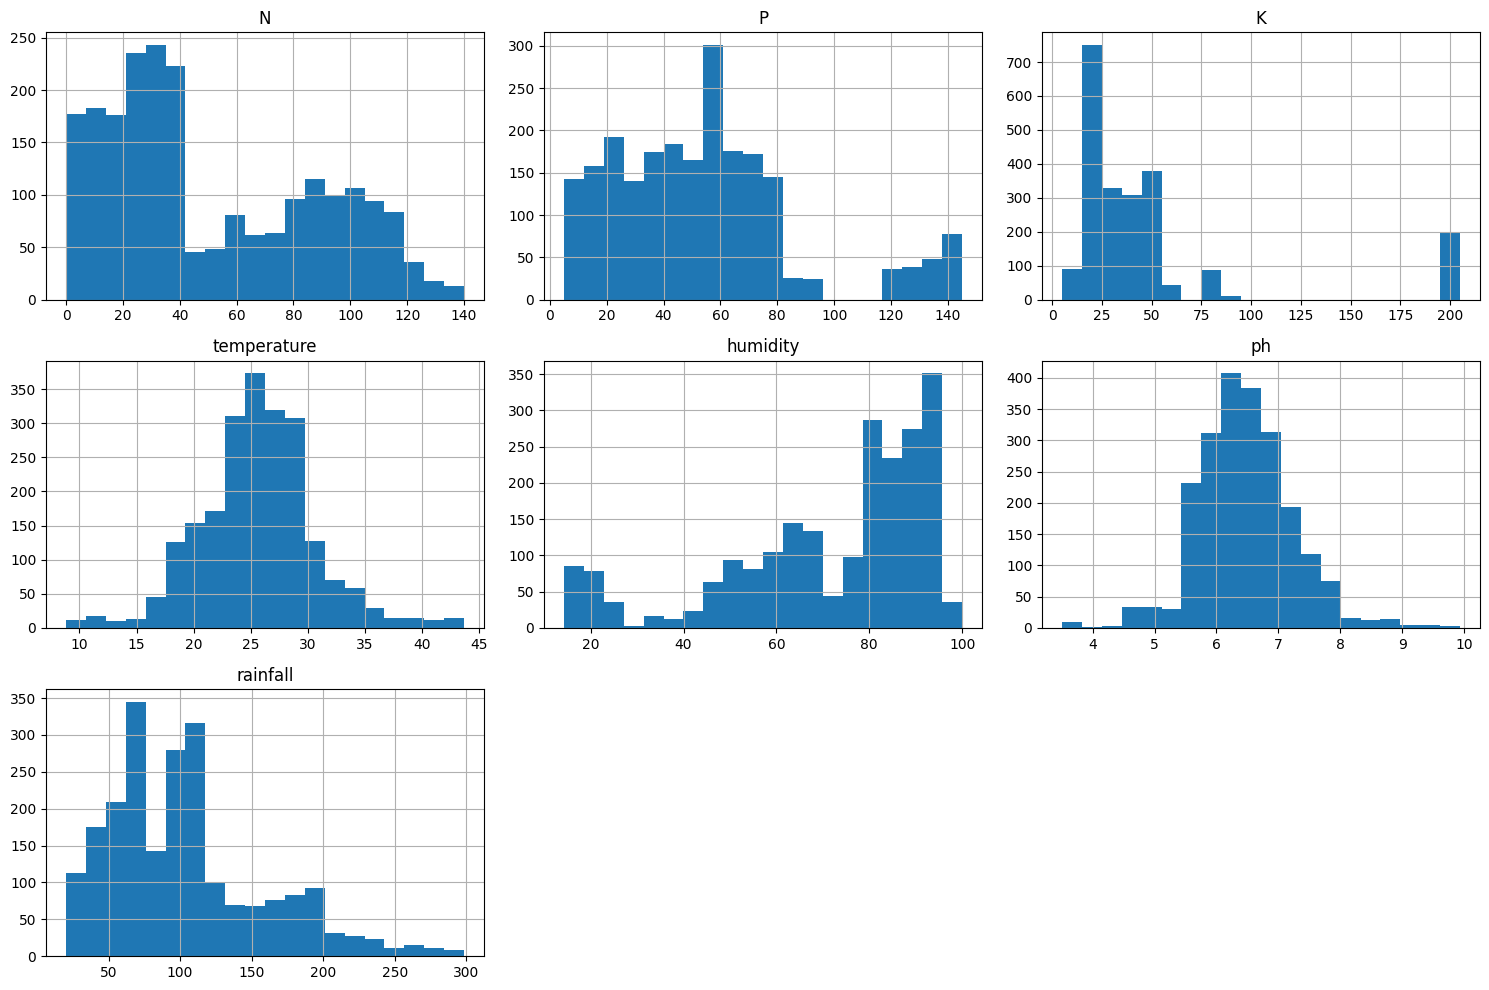

In [32]:
# Getting Distribution of each feature
df.drop('label', axis=1).hist(bins= 20, figsize=(15, 10))
plt.tight_layout()
plt.show()

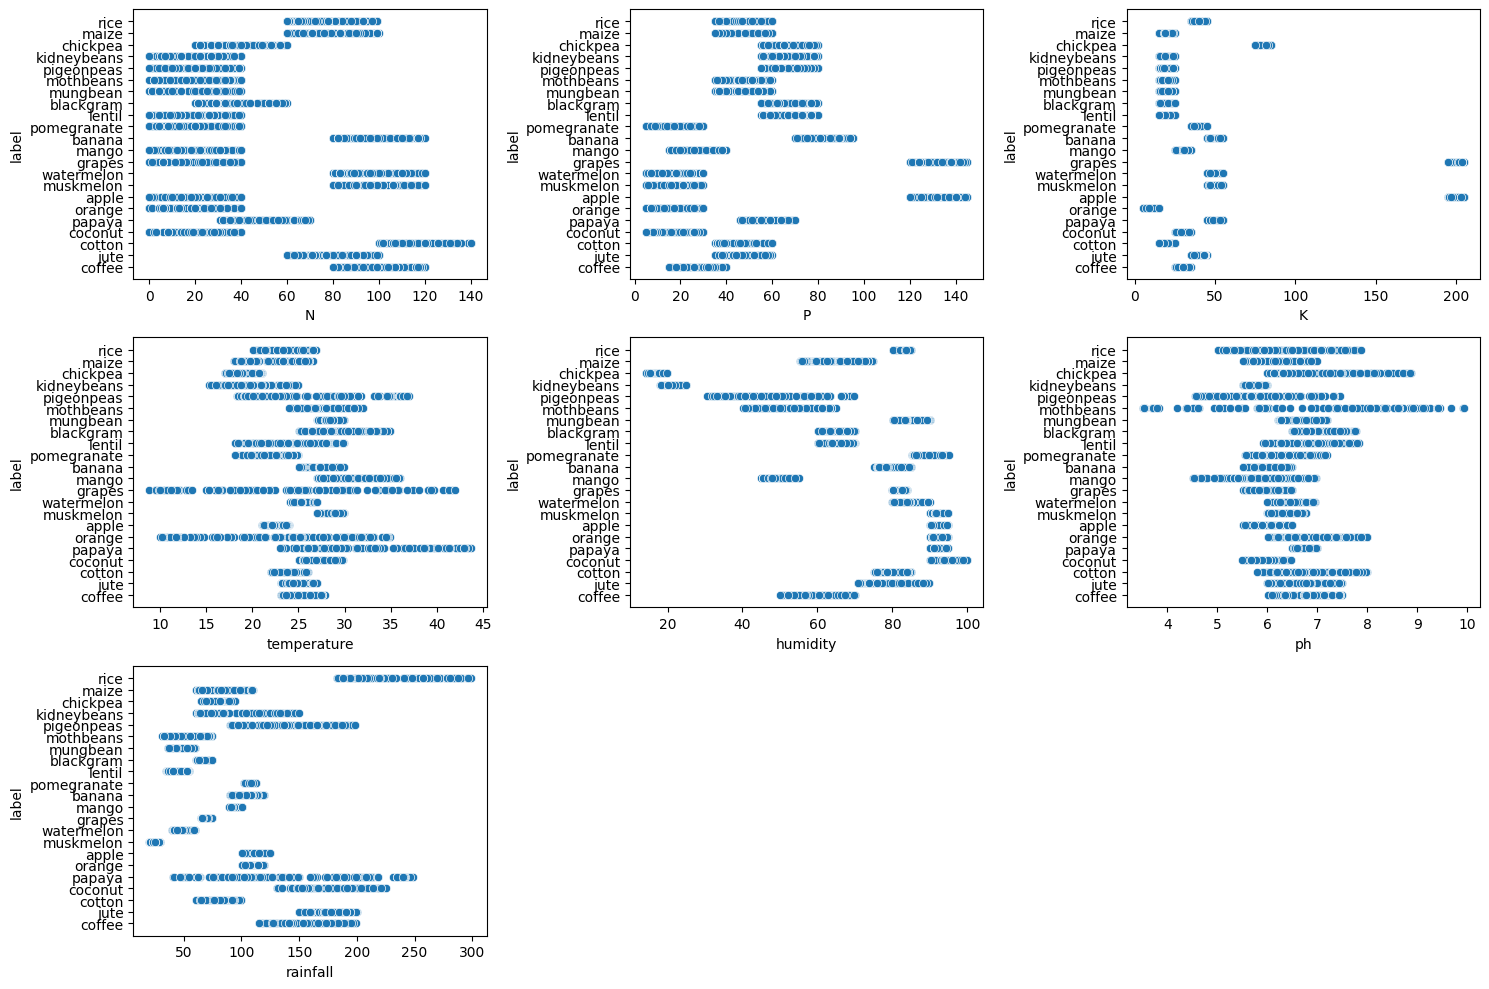

In [33]:
# Scatter Plots label vs features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns.drop('label')):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=col, y='label', data=df, )
plt.tight_layout()
plt.show()

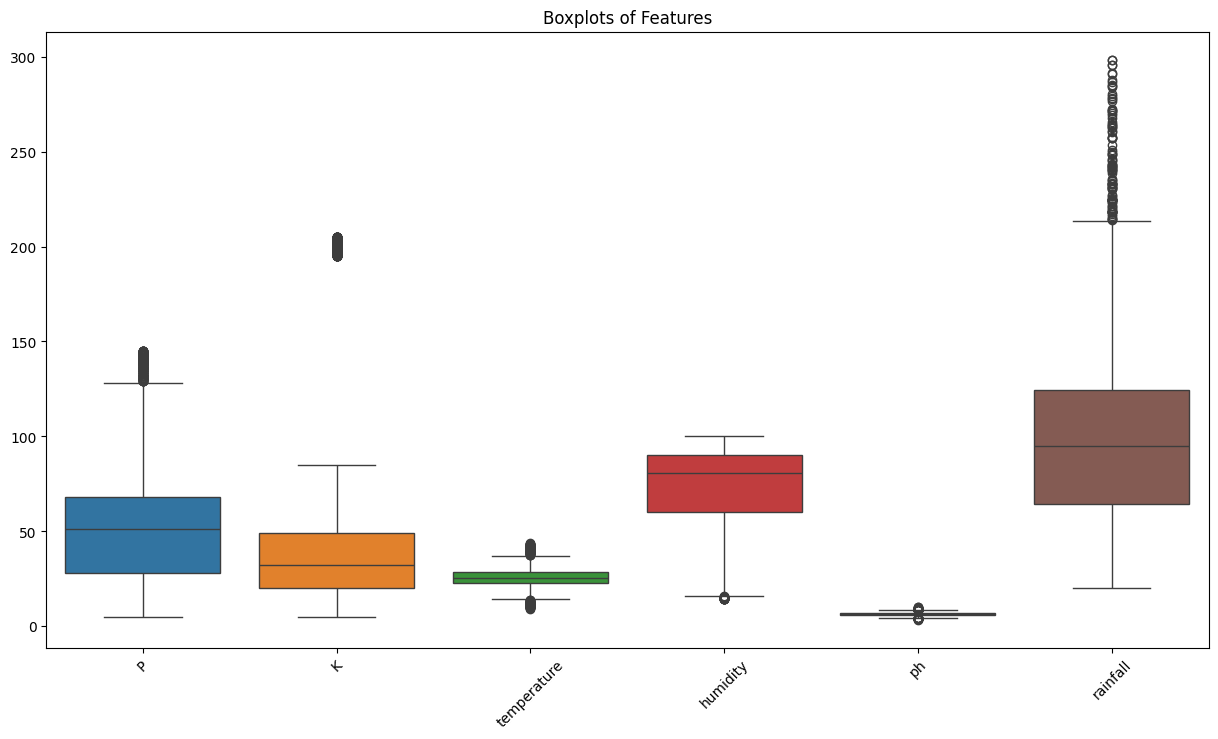

In [34]:
# Boxplots for Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('N', axis=1))
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

#### Observations
- Outliers present in dataset for P, K, temperature, humidity and rainfall

In [35]:
## Outliers Treatment

# Identifying numerical columns
cols = ["P", "K", "temperature", "humidity", "rainfall"]

# Define percentile limits
lower_percentile = 1
upper_percentile = 99

# Apply capping and flooring using scaled bounds
for col in cols:
    lower_bound = 0.3 * np.percentile(df[col], lower_percentile)  # Scaled lower bound
    upper_bound = 3 * np.percentile(df[col], upper_percentile)  # Scaled upper bound
    
    # Apply capping and flooring
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


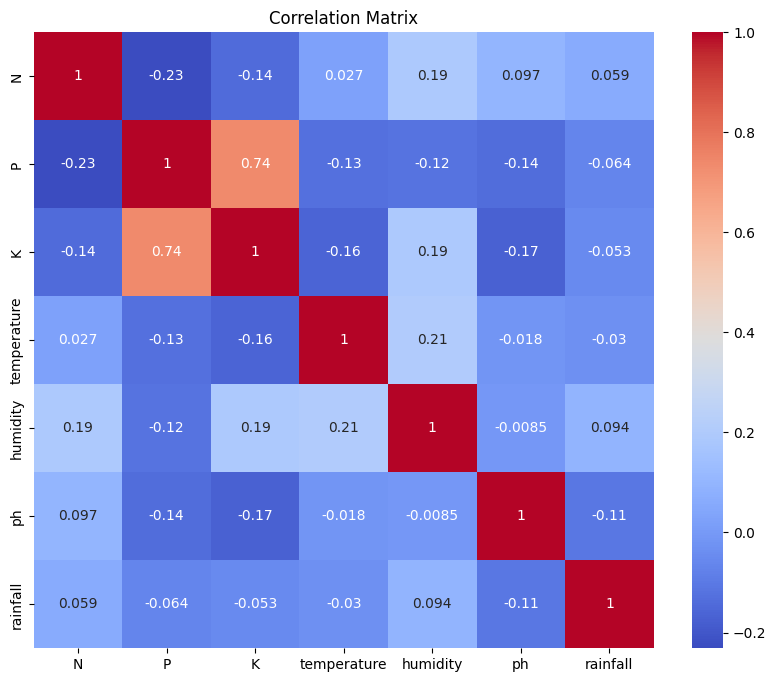

In [36]:
# Correlation Matrix 
corr = df.drop('label', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Observations
- Likely a moderate-to-strong negative correlation between temperature and humidity.
- Weak or No Correlation: Nutrients like nitrogen (N), phosphorus (P), and potassium (K) typically show weak correlations with environmental factors (temperature, humidity, rainfall).
- Likely a moderate positive correlation between rainfall and humidity.
- Nutrients like nitrogen (N), phosphorus (P), and potassium (K) typically show weak correlations with environmental factors (temperature, humidity, rainfall).
- pH often shows minimal correlation with other variables (close to 0).
- Slight negative correlation between temperature and rainfall.

#### Conclusion
No Multicollinearity: Most features (e.g., N, P, K, pH) are weakly correlated, meaning they contribute unique information.
Implication: No need to drop features for multicollinearity in models like Random Forest.

In [37]:
# Imports
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Separate features and target variable
X = df.drop("label", axis=1)  # Features (N, P, K, temperature, humidity, pH, rainfall)
y = df["label"]  # Target (crop)

# Encode target variable (Convert crop names to numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [39]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(label_encoder.classes_), eval_metric="mlogloss")

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=22, num_parallel_tree=None, ...)

In [40]:
y_pred = xgb_model.predict(X_test)

In [41]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.

In [42]:
# Define a stricter regularization grid
param_grid = {
    "max_depth": [2],  # Further reduce tree depth
    "learning_rate": [0.05, 0.1],  # Keep learning rate steady
    "n_estimators": [50, 80],  # Reduce number of trees to prevent excessive learning
    "gamma": [0.1, 0.2],  # Increase tree pruning
    "subsample": [0.7, 0.8],  # Reduce training sample size per tree
    "colsample_bytree": [0.7, 0.8],  # Reduce feature selection per tree
    "reg_lambda": [2.0, 3.0],  # Stronger L2 Regularization
    "reg_alpha": [1.0, 2.0]  # Stronger L1 Regularization
}

# Train again with stricter regularization
grid_search = GridSearchCV(xgb.XGBClassifier(objective="multi:softmax", num_class=len(label_encoder.classes_), eval_metric="mlogloss"),
                           param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters After Final Re-Tuning:", best_params)

# Train with final best parameters
best_xgb_model = xgb.XGBClassifier(**best_params, objective="multi:softmax", num_class=len(label_encoder.classes_), eval_metric="mlogloss")
best_xgb_model.fit(X_train, y_train)

# Check performance
y_pred_best = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Tuned Model Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters After Final Re-Tuning: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 80, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Final Tuned Model Accuracy: 0.9864


In [43]:
grid_search.best_score_

0.99375

In [44]:
train_acc = accuracy_score(y_train, best_xgb_model.predict(X_train))
test_acc = accuracy_score(y_test, best_xgb_model.predict(X_test))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9989
Testing Accuracy: 0.9864


In [45]:
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.98295455 0.99147727 1.         1.         0.99431818]
Mean Accuracy: 0.9938, Std Dev: 0.0063


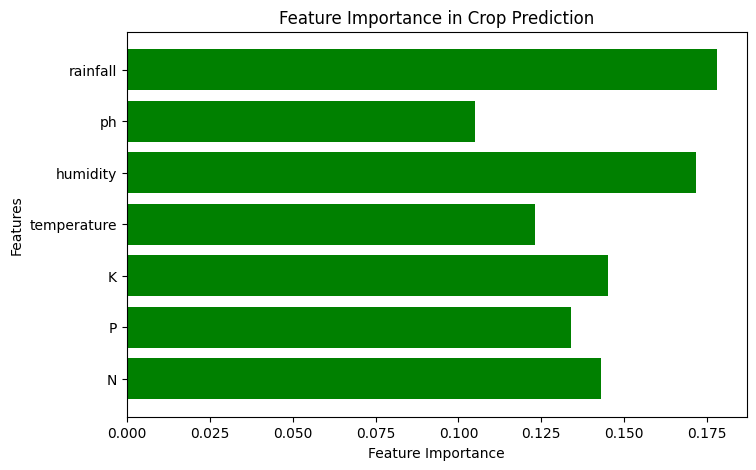

In [46]:
import matplotlib.pyplot as plt

importance = best_xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importance, color="green")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Crop Prediction")
plt.show()


### Fine Tuned Model and removed overfitting

### Predictive System

In [47]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction = best_xgb_model.predict(features)
    crop = label_encoder.inverse_transform(prediction)[0]    
    return f"{crop} is a best crop to be cultivated." 

In [48]:
# Predicting the crop for the given environment
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

'rice is a best crop to be cultivated.'